In [3]:
import pandas as pd
import pandas_profiling
import os
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tsne_animate import tsneAnimate
import seaborn as sns
import matplotlib.cm as cm 

In [4]:
pheno = pd.read_csv('../../Lung/Lung_Phenotype_Metadata.txt', sep='\t')

In [5]:
df_upper = pd.read_csv('../../df_upper.csv')

In [6]:
del df_upper['Unnamed: 0']

In [7]:
df_upper.set_index('rowname', inplace=True)

In [8]:
pheno.set_index('SampleID', inplace=True)

In [9]:
ph = pd.DataFrame(pheno['Diagnosis'])

In [10]:
diag = pd.merge(df_upper,ph, left_index=True, right_index=True, how='inner')

In [11]:
non_squamous = diag.loc[diag['Diagnosis']=='Lung Adenocarcinoma',]
squamous = diag.loc[diag['Diagnosis'] == 'Lung Squamous Cell Carcinoma',]

In [12]:
squamous = squamous.loc[:, squamous.columns != 'Diagnosis']
non_squamous = non_squamous.loc[:,non_squamous.columns != 'Diagnosis',]

In [13]:
tsne = TSNE(perplexity=2, verbose=2, n_iter=1000,learning_rate=500).fit_transform(squamous)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 496 samples in 0.541s...
[t-SNE] Computed neighbors for 496 samples in 16.064s...
[t-SNE] Computed conditional probabilities for sample 496 / 496
[t-SNE] Mean sigma: 6.405166
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 109.3490448, gradient norm = 0.2483817 (50 iterations in 0.297s)
[t-SNE] Iteration 100: error = 102.8198395, gradient norm = 0.2544248 (50 iterations in 0.315s)
[t-SNE] Iteration 150: error = 107.3472137, gradient norm = 0.2776080 (50 iterations in 0.298s)
[t-SNE] Iteration 200: error = 100.0357285, gradient norm = 0.2979378 (50 iterations in 0.329s)
[t-SNE] Iteration 250: error = 103.2441940, gradient norm = 0.2840513 (50 iterations in 0.298s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.244194
[t-SNE] Iteration 300: error = 3.0346508, gradient norm = 0.0140641 (50 iterations in 0.300s)
[t-SNE] Iteration 350: error = 2.6323340, gradient norm = 0.008

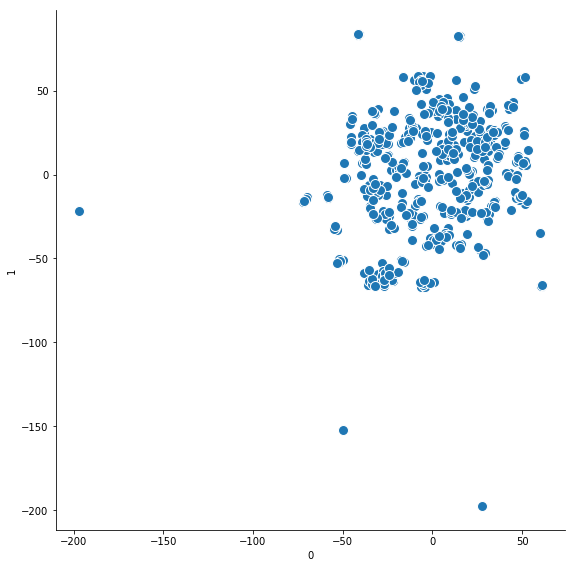

In [16]:
sns.pairplot(x_vars=[0], y_vars=[1], data=pd.DataFrame(tsne), size=8, plot_kws={"s": 100})

### Test multiple perplexities

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30,20))
perplexities = [2,5,30,50,100]
for i, ax in enumerate(fig.axes):
    print(i)
    tsne = TSNE(perplexity=perplexities[i], verbose=2).fit_transform(squamous)
    ax.scatter(tsne[:,0],tsne[:,1])

In [ ]:
tsne = TSNE(perplexity=2, verbose=2, n_iter=2000,learning_rate=500).fit_transform(squamous)

In [ ]:
# fig.savefig('../../Documents/BBD/tsne.png', dpi=300)

In [ ]:
tsne = TSNE(perplexity=100, verbose=2).fit_transform(df_upper)
plt.figure(figsize=(12,12))
plt.scatter(tsne[:,0],tsne[:,1])

In [ ]:
tsne = TSNE

---

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p = pca.fit_transform(df_upper)

In [ ]:
plt.scatter(p[:,0], p[:,1])

---

In [ ]:
methyl = pd.read_csv('Lung/Lung_Methylation.txt', sep='\t')

In [ ]:
methyl.head()